### Import & Load Packages

In [1]:
import numpy as np # untuk manipulasi objek array dan fungsi aritmatika lainnya
import pandas as pd # untuk menipulasi objek dataframe
import matplotlib.pyplot as plt # untuk visualisasi data
import seaborn as sns # untuk visualisasi data yang jauh lebih mudah

# untuk spliting data menjadi train dan test
from sklearn.model_selection import train_test_split
# untuk pemodelan regresi linier menggunakan statsmodels
import statsmodels.api as sm
# untuk pemodelan linear regression
from sklearn.linear_model import LinearRegression
# untuk pemodelan regresi polinomial
from sklearn.preprocessing import PolynomialFeatures
# untuk pemodelan knn regression
from sklearn.neighbors import KNeighborsRegressor
# untuk pemodelan regression tree
from sklearn.tree import DecisionTreeRegressor
# untuk evaluasi model
from sklearn import metrics
# untuk evaluasi model menggunakan cross-validation
from sklearn.model_selection import KFold, cross_val_score

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


### Read Dataset

In [3]:
raw_data = pd.read_csv("Automobile_data.csv")
raw_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [5]:
raw_data.isna().sum()


symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

### Preprocessing Data

In [6]:
# delete row that contain any "?"

for i in raw_data.columns:
  raw_data = raw_data[raw_data[i] != '?']

print(raw_data.shape)

(159, 26)


In [7]:
# transform string numeric data to integer

for i in raw_data.columns:
  if raw_data[i].dtype == 'object':
    try:
      if "." in str(raw_data[i]):
        raw_data[i] = raw_data[i].astype('float64')
      else:
        raw_data[i] = raw_data[i].astype('int64')
    except:
      continue

raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 3 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          159 non-null    int64  
 1   normalized-losses  159 non-null    float64
 2   make               159 non-null    object 
 3   fuel-type          159 non-null    object 
 4   aspiration         159 non-null    object 
 5   num-of-doors       159 non-null    object 
 6   body-style         159 non-null    object 
 7   drive-wheels       159 non-null    object 
 8   engine-location    159 non-null    object 
 9   wheel-base         159 non-null    float64
 10  length             159 non-null    float64
 11  width              159 non-null    float64
 12  height             159 non-null    float64
 13  curb-weight        159 non-null    int64  
 14  engine-type        159 non-null    object 
 15  num-of-cylinders   159 non-null    object 
 16  engine-size        159 non

In [8]:
# cek nilai unik dari tiap kolom

## ekstrak nama kolom dari dataset
column_names = raw_data.columns

## lakukan iterasi untuk mengecek nilai unik dari tiap kolom
for i in column_names:
  print("Column name: {}".format(i))
  print(raw_data[i].unique())

Nama kolom: symboling
[ 2  1  0 -1  3 -2]
Nama kolom: normalized-losses
[164. 158. 192. 188. 121.  98.  81. 118. 148. 110. 145. 137. 101.  78.
 106.  85. 107. 104. 113. 129. 115.  93. 142. 161. 153. 125. 128. 122.
 103. 168. 108. 194. 231. 119. 154.  74. 186. 150.  83. 102.  89.  87.
  77.  91. 134.  65. 197.  90.  94. 256.  95.]
Nama kolom: make
['audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'jaguar' 'mazda' 'mercedes-benz'
 'mitsubishi' 'nissan' 'peugot' 'plymouth' 'porsche' 'saab' 'subaru'
 'toyota' 'volkswagen' 'volvo']
Nama kolom: fuel-type
['gas' 'diesel']
Nama kolom: aspiration
['std' 'turbo']
Nama kolom: num-of-doors
['four' 'two']
Nama kolom: body-style
['sedan' 'hatchback' 'wagon' 'hardtop' 'convertible']
Nama kolom: drive-wheels
['fwd' '4wd' 'rwd']
Nama kolom: engine-location
['front']
Nama kolom: wheel-base
[ 99.8  99.4 105.8 101.2  88.4  94.5  93.7 103.3  95.9  86.6  96.5 113.
  93.1  98.8 104.9 110.  106.7 115.6  96.6  93.   96.3  95.1  97.2 100.4
  91.3  99.2 107.9 108.   99.

### Menghitung korelasi menggunakan korelasi Pearson

C:\Users\HP\AppData\Local\Temp\ipykernel_16948\1421690915.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(raw_data.corr(), cmap="YlGnBu", annot=True)


<AxesSubplot:>

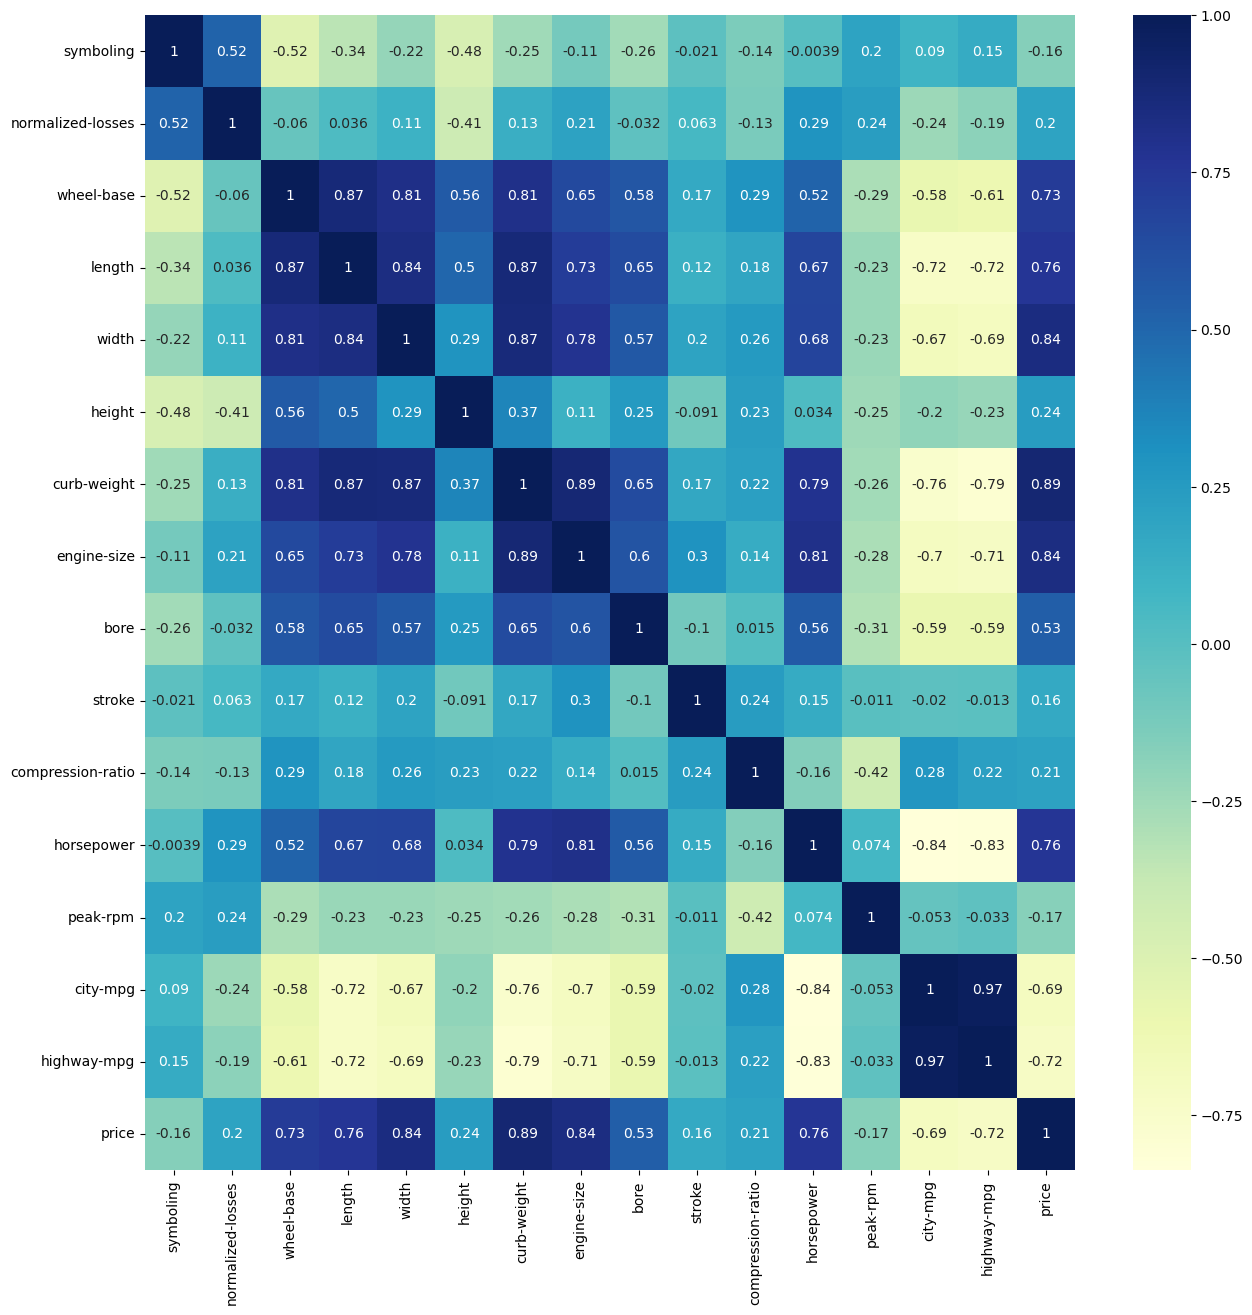

In [10]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(raw_data.corr(), cmap="YlGnBu", annot=True)

<AxesSubplot:>

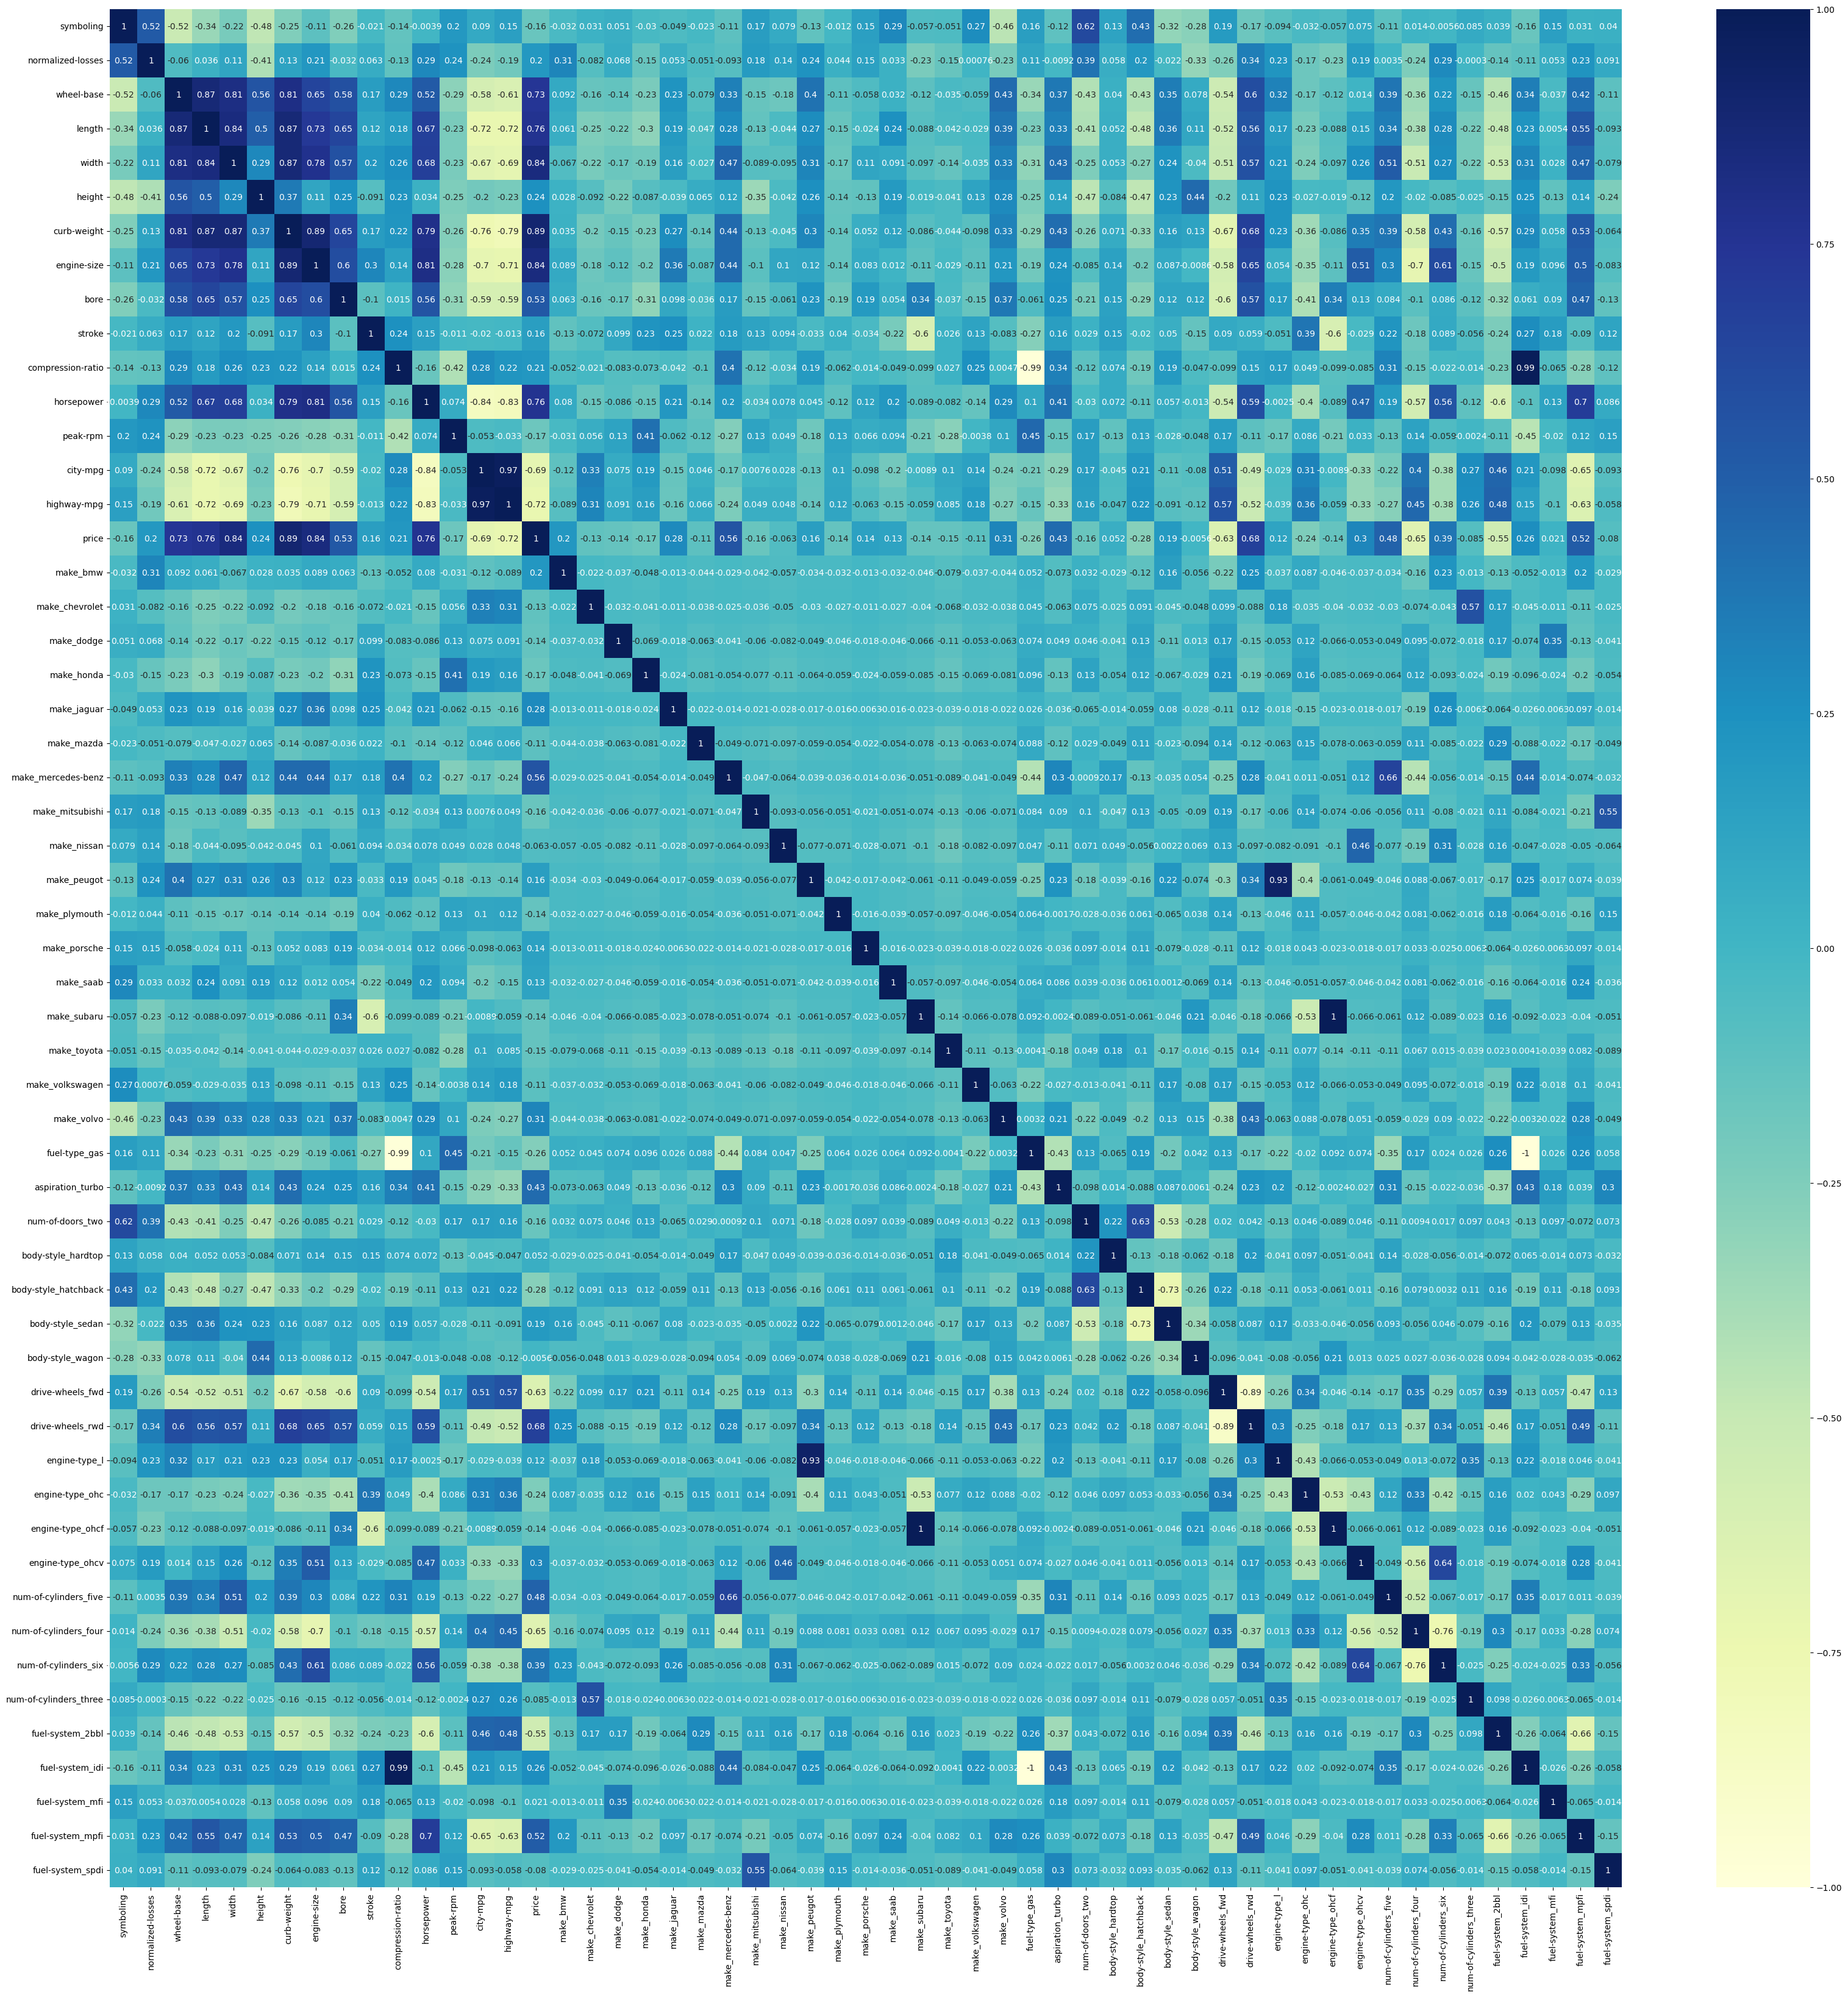

In [11]:
x_data = pd.get_dummies(raw_data, drop_first = True, dtype = 'int8')

fig, ax = plt.subplots(figsize=(40, 40))
sns.heatmap(x_data.corr(), cmap="YlGnBu", annot=True)

### Remove Unused Column

In [12]:
new_data = pd.DataFrame({
    "merek": raw_data["make"],
    # "bahan-bakar": raw_data["fuel-type"],
    # "udara": raw_data["aspiration"],
    "jlh-pintu": raw_data["num-of-doors"],
    # "body": raw_data["body-style"],
    # "jenis-ban": raw_data["drive-wheels"],
    "roda": raw_data["wheel-base"],
    # "panjang": raw_data["length"],
    "lebar": raw_data["width"],
    "berat": raw_data["curb-weight"],
    # "jlh-silinder": raw_data["num-of-cylinders"],
    # "tipe-mesin": raw_data["engine-type"],
    "uk-mesin": raw_data["engine-size"],
    "tenaga": raw_data["horsepower"],
    # "rasio-comp": raw_data["compression-ratio"],
    "price": raw_data["price"],
})
new_data.head()

,merek,jlh-pintu,roda,lebar,berat,uk-mesin,tenaga,price
3,audi,four,99.8,66.2,2337,109,102.0,13950.0
4,audi,four,99.4,66.4,2824,136,115.0,17450.0
6,audi,four,105.8,71.4,2844,136,110.0,17710.0
8,audi,four,105.8,71.4,3086,131,140.0,23875.0
10,bmw,two,101.2,64.8,2395,108,101.0,16430.0


In [40]:
# memisahkan variabel x dan y dari tabel
X_data = new_data.drop('price', axis = 1)
y_data = new_data['price']

In [41]:
X_data = pd.get_dummies(X_data, drop_first = True, dtype = 'int8')

In [42]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(
    # variabel X
    X_data,
    # variabel target
    y_data,
    # ukuran test data
    test_size = 0.20,
    # random state untuk reproducibility
    random_state = 50
)

# Modeling

## Linear Regression

Membuat model linear regression menggunakan StatsModels

In [184]:
Input = sm.add_constant(X_train)

# Modelling dengan statsmodels
SimpleModel = sm.OLS(y_train.values, Input)
results = SimpleModel.fit()

# cek simpulan dari model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     96.94
Date:                Sun, 06 Oct 2024   Prob (F-statistic):           3.43e-59
Time:                        13:51:07   Log-Likelihood:                -1091.1
No. Observations:                 127   AIC:                             2228.
Df Residuals:                     104   BIC:                             2294.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -2.344e+04   1.14e+04     -2.062      0.042    -4.6e+04    -901.423
roda                  -57.5899     65.367     -0.881      0.380    -187.216      72.036
lebar                 425.8349    206.274      2.064      0.041      16.786     834.884
berat                   4.8034      1.043      4.605      0.000       2.735       6.872
uk-mesin                1.4264     14.065      0.101      0.919     -26.465      29.318
tenaga                 40.9436      9.690      4.225      0.000      21.728      60.159
merek_bmw            3417.9680   1334.328      2.562      0.012     771.945    6063.991
merek_chevrolet     -3026.3579   1417.653     -2.135      0.035   -5837.617    -215.099
merek_dodge         -5022.2387   1182.688     -4.246      0.000   -7367.553   -2676.924
merek_honda         -3901.3550   1052.622     -3.706      0.000   -5988.743   -1813.967
merek_jaguar         5454.1689   2103.191      2.593      0.011    1283.463    9624.875
merek_mazda         -3216.8270   1063.999     -3.023      0.003   -5326.778   -1106.876
merek_mercedes-benz  6189.8899   1225.663      5.050      0.000    3759.354    8620.426
merek_mitsubishi    -5558.1618   1057.932     -5.254      0.000   -7656.081   -3460.243
merek_nissan        -3981.6452   1070.857     -3.718      0.000   -6105.196   -1858.095
merek_peugot        -2865.7676   1108.571     -2.585      0.011   -5064.106    -667.429
merek_plymouth      -4647.6908   1164.126     -3.992      0.000   -6956.197   -2339.185
merek_porsche       -4.248e-12   5.88e-13     -7.223      0.000   -5.41e-12   -3.08e-12
merek_saab          -2860.4841   1050.736     -2.722      0.008   -4944.133    -776.835
merek_subaru        -5095.7567   1007.935     -5.056      0.000   -7094.530   -3096.983
merek_toyota        -4381.4486    978.689     -4.477      0.000   -6322.226   -2440.671
merek_volkswagen    -4238.1852   1012.394     -4.186      0.000   -6245.800   -2230.571
merek_volvo         -1668.3018   1024.103     -1.629      0.106   -3699.137     362.534
jlh-pintu_two          94.9063    324.787      0.292      0.771    -549.158     738.971
==============================================================================
Omnibus:                       23.820   Durbin-Watson:                   2.158
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.486
Skew:                           0.656   Prob(JB):                     6.02e-15
Kurtosis:                       6.264   Cond. No.                     1.84e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.34e-32. This might indicate that there are
strong multicollinearity problems or that the design matr

Membuat model linear regression menggunakan Scikit-Learn dan Menghasilkan prediksi dari  model regresi linier

In [185]:
linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train)

# membuat prediksi model
linreg_result = linreg_model.predict(X_test)

In [186]:
# Evaluasi model linear regression - R^2
print("R^2  =", linreg_model.score(X_test,y_test), "\n")

# Evaluasi model linear regression - MSE
print("MSE  =", metrics.mean_squared_error(y_test, linreg_result), "\n")

# Evaluasi model linear regression - RMSE
print("RMSE =", np.sqrt(metrics.mean_squared_error(y_test, linreg_result)), "\n")

# Evaluasi model linear regression - MAPE
print("MAPE =", metrics.mean_absolute_percentage_error(y_test, linreg_result) * 100)

R^2  = 0.8552407168364933 

MSE  = 3651638.9223431004 

RMSE = 1910.9261948968883 

MAPE = 12.752467993535472


# Polynomial Regression

## Feature Engineering

In [177]:
# membuat fitur polynomial berderajat 1
poly = PolynomialFeatures(1)
X_train_poly = poly.fit(X_train).transform(X_train)

# cek nilai X_train_poly
X_train_poly

array([[  1. ,  91.3,  67.9, ...,   0. ,   0. ,   1. ],
       [  1. ,  97.3,  65.5, ...,   1. ,   0. ,   1. ],
       [  1. ,  97.3,  65.5, ...,   1. ,   0. ,   0. ],
       ...,
       [  1. ,  93.1,  64.2, ...,   0. ,   0. ,   1. ],
       [  1. ,  95.7,  63.6, ...,   0. ,   0. ,   1. ],
       [  1. , 104.5,  66.5, ...,   0. ,   0. ,   0. ]])

In [178]:
# transformasi pada X_test
X_test_poly = poly.transform(X_test)
X_test_poly

array([[1.000e+00, 1.004e+02, 6.650e+01, 3.296e+03, 1.810e+02, 1.520e+02,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [1.000e+00, 9.910e+01, 6.650e+01, 2.847e+03, 1.210e+02, 1.600e+02,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [1.000e+00, 1.091e+02, 6.880e+01, 3.049e+03, 1.410e+02, 1.600e+02,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00],
       [1.000e+00, 1.043e+02, 6.720e+01, 2.935e+03, 1.410e+02, 1.140e+02,
        0.000e+00, 0.000e+00, 0.000

## Modeling

In [179]:
polyreg_model = LinearRegression()
polyreg_model.fit(X_train_poly, y_train)

# membuat prediksi model
polyreg_result = polyreg_model.predict(X_test_poly)

## Evaluasi

In [180]:
# Evaluasi model linear regression - R^2
print("R^2  =", polyreg_model.score(X_test_poly, y_test), "\n")

# Evaluasi model linear regression - MSE
print("MSE  =", metrics.mean_squared_error(y_test, polyreg_result), "\n")

# Evaluasi model linear regression - RMSE
print("RMSE =", np.sqrt(metrics.mean_squared_error(y_test, polyreg_result)), "\n")

# Evaluasi model linear regression - MAPE
print("MAPE =", metrics.mean_absolute_percentage_error(y_test, polyreg_result) * 100)

R^2  = 0.855240716836493 

MSE  = 3651638.922343108 

RMSE = 1910.9261948968904 

MAPE = 12.752467993535452


# KNN Regression

## Modeling

Membuat model KNN untuk regresi

In [181]:
knn_model = KNeighborsRegressor(n_neighbors=1)
knn_model.fit(X_train, y_train)

# membuat prediksi model
knn_result = knn_model.predict(X_test)

## Evaluasi

In [182]:
# Evaluasi model linear regression - R^2
print("R^2  =", knn_model.score(X_test, y_test), "\n")

# Evaluasi model linear regression - MSE
print("MSE  =", metrics.mean_squared_error(y_test, knn_result), "\n")

# Evaluasi model linear regression - RMSE
print("RMSE =", np.sqrt(metrics.mean_squared_error(y_test, knn_result)), "\n")

# Evaluasi model linear regression - MAPE
print("MAPE =", metrics.mean_absolute_percentage_error(y_test, knn_result) * 100)

R^2  = 0.6729800325356095 

MSE  = 8249272.96875 

RMSE = 2872.1547605848123 

MAPE = 15.393034815231083


# Regression Tree

## Modeling

Membuat model regression tree

In [261]:
regtree_model = DecisionTreeRegressor(max_depth=10)
regtree_model.fit(X_train, y_train)

# membuat prediksi model
regtree_result = regtree_model.predict(X_test)

## Evaluasi

In [262]:
# Evaluasi model linear regression - R^2
print("R^2  =", regtree_model.score(X_test, y_test), "\n")

# Evaluasi model linear regression - MSE
print("MSE  =", metrics.mean_squared_error(y_test, regtree_result), "\n")

# Evaluasi model linear regression - RMSE
print("RMSE =", np.sqrt(metrics.mean_squared_error(y_test, regtree_result)), "\n")

# Evaluasi model linear regression - MAPE
print("MAPE =", metrics.mean_absolute_percentage_error(y_test, regtree_result) * 100)

R^2  = 0.9013826940657746 

MSE  = 2487680.1328125 

RMSE = 1577.2381344655917 

MAPE = 9.577286727937787


In [49]:
# Evaluasi model linear regression - R^2
print("R^2  =", regtree_model.score(X_test, y_test), "\n")

# Evaluasi model linear regression - MSE
print("MSE  =", metrics.mean_squared_error(y_test, regtree_result), "\n")

# Evaluasi model linear regression - RMSE
print("RMSE =", np.sqrt(metrics.mean_squared_error(y_test, regtree_result)), "\n")

# Evaluasi model linear regression - MAPE
print("MAPE =", metrics.mean_absolute_percentage_error(y_test, regtree_result) * 100)

R^2  = 0.7876134727962176 

MSE  = 5357576.33203125 

RMSE = 2314.6438888155667 

MAPE = 11.441028002719769


# Tabel Perbandingan Algoritma Terbaik

In [263]:
algo_result = pd.DataFrame({
    "Algorithm": ["Linear Regression", "Polynomial Regression", "KNN", "Regression Tree"],
    "R^2": [linreg_model.score(X_test, y_test), polyreg_model.score(X_test_poly, y_test), knn_model.score(X_test, y_test), regtree_model.score(X_test, y_test)],
    "MSE": [metrics.mean_squared_error(y_test, linreg_result), metrics.mean_squared_error(y_test, polyreg_result), metrics.mean_squared_error(y_test, knn_result), metrics.mean_squared_error(y_test, regtree_result)],
    "RMSE": [np.sqrt(metrics.mean_squared_error(y_test, linreg_result)), np.sqrt(metrics.mean_squared_error(y_test, polyreg_result)), np.sqrt(metrics.mean_squared_error(y_test, knn_result)), np.sqrt(metrics.mean_squared_error(y_test, regtree_result))],
    "MAPE": [metrics.mean_absolute_percentage_error(y_test, linreg_result) * 100, metrics.mean_absolute_percentage_error(y_test, polyreg_result) * 100, metrics.mean_absolute_percentage_error(y_test, knn_result) * 100, metrics.mean_absolute_percentage_error(y_test, regtree_result) * 100],
})

algo_result.round(3)
algo_result.style.format({"R^2":"{:,.3f}", "MSE":"{:,.3f}", "RMSE":"{:,.3f}", "MAPE":"{:.3f}%"})

,Algorithm,R^2,MSE,RMSE,MAPE
0,Linear Regression,0.855,"3,651,638.922","1,910.926",12.752%
1,Polynomial Regression,0.855,"3,651,638.922","1,910.926",12.752%
2,KNN,0.673,"8,249,272.969","2,872.155",15.393%
3,Regression Tree,0.901,"2,487,680.133","1,577.238",9.577%
